In [98]:
import pandas as pd
from sklearn.datasets import load_breast_cancer, load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [99]:
cancer_data = load_breast_cancer()
df = pd.DataFrame(data=cancer_data['data'],columns=cancer_data['feature_names'])
df['target'] = cancer_data.target
target_names = cancer_data.target_names
print(target_names)
print(df)

['malignant' 'benign']
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  m

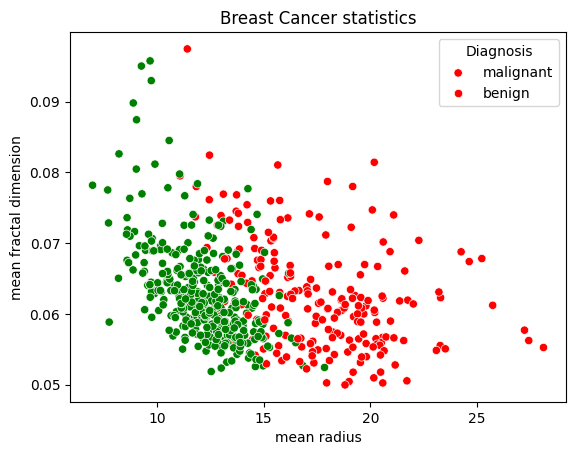

'plot breast cancer - binary'

In [100]:
sns.scatterplot(data=df, x="mean radius", y="mean fractal dimension", hue=cancer_data['target'],palette={0:'Red',1:'Green'})
plt.title("Breast Cancer statistics")
plt.legend(title='Diagnosis', labels=target_names)
plt.show()
"""plot breast cancer - binary"""


In [101]:
iris_data = load_iris()
dataset = pd.DataFrame(data=iris_data['data'],columns=iris_data['feature_names'])
 #x=dataset.copy() #Deep copy #x=dataset[:]
dataset['target'] = iris_data.target
target_names=iris_data.target_names
print(dataset)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

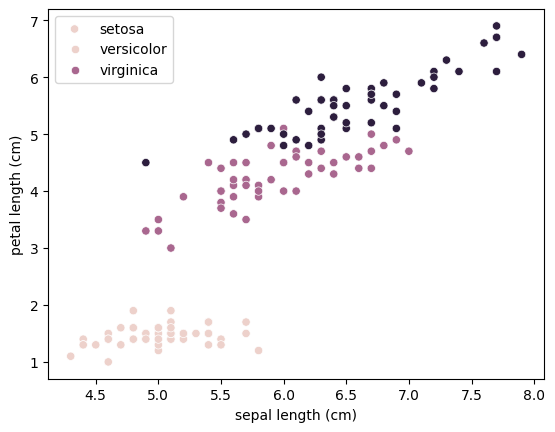

In [102]:
"""iris data plot - multi clasifier"""
sns.scatterplot(data=dataset,x="sepal length (cm)",y="petal length (cm)", hue='target')
plt.legend(labels=target_names)
plt.show()

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
x=iris_data.data
y=iris_data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = DecisionTreeClassifier(max_depth=3) #parameters
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print(prediction)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [116]:
accuracy = accuracy_score(y_test,prediction)
classification = classification_report(y_test,prediction)
confusion = confusion_matrix(y_test,prediction)
print("accuracy: ",accuracy)
print("classificationreport: \n",classification)
print("confusion_matrix: \n",confusion)

print("Train accuracy:", model.score(x_train, y_train))
print("Test accuracy:", model.score(x_test, y_test))

accuracy:  1.0
classificationreport: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion_matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Train accuracy: 0.9583333333333334
Test accuracy: 1.0


In [111]:
print("x_test: ",x_test.shape, "y_test: ",y_test) #no of records 
print("x_train: ",x_train.shape, "y_train: ",y_train)

x_test:  (30, 4) y_test:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
x_train:  (120, 4) y_train:  [0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2]


In [112]:
dtc_model = DecisionTreeClassifier(max_depth=3)
dtc_model.fit(x_train,y_train)
dtc_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [117]:
predictions = dtc_model.predict(x_test)
print(predictions)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [122]:
from sklearn.metrics import precision_score,recall_score
print("Accuracy score: ",round(100*accuracy_score(y_test,predictions),2),'%')
print("Precision score: ",round(100*precision_score(y_test,predictions,average='macro'),2),'%')
print("Recall score: ",round(100*recall_score(y_test,predictions,average='micro'),2),'%')

Accuracy score:  100.0 %
Precision score:  100.0 %
Recall score:  100.0 %
